¡A BARRIGA LLENA CORAZÓN CONTENTO!

ESTE ES MI PROYECTO DEL PRIMER SEMESTRE DE LAS ASIGNATURAS INTRODUCCIÓN A CIENCIA DE DATOS Y PROGRAMACIÓN
                               

En este proyecto tiene como objetivo por medio de datos contar una historia respondieron una serie de interrogantes sobre los restaurantes y bares de La Habana, Capital de Cuba

Importación de las bibliotecas de Python utilizadas en el proyecto  :

In [29]:

from library import media
from library import list_restaurant
from library import count_muni
from library import pyplot_bar
from library import drinks
from library import map
from library import search_person
from library import dlvrs
from library import porcent
from library import pb


Con ayuda de la biblioteca de Pandas de Python le muestro  los restaurantes analizados, cuyos menus los conseguí por medio del canal de Telegram MenuCuba, menus de lugares que han visitado mis familiares, lugares que ido persolmente para obtener información y del grupo de Whatsapp del Grupo de Ciencia de Datos de la Matcom, donde estudio.

 Cantidad de Restaurantes por Municipio :

In [30]:
count_muni()

Arroyo Naranjo : 11
Boyero : 10
Centro Habana : 14
Cotorro : 10
Cerro : 10
Diez de Octubre : 30
Guanabacoa : 10
Habana del Este : 11
Habana Vieja : 30
La Lisa : 11
Marianao : 11
Playa : 13
Plaza de la Revolución : 13
Regla : 5
San Miguel del Padrón : 11
Total : 200


In [31]:

list_restaurant()

,Restaurantes
0,El Pellizcazo
1,La Ronda (Bar)
2,Los Nardos
3,La Fela
4,Mundo Pizza
5,DKmino
6,Teniente Rey 360
7,Pasos Habaneros
8,Cafe Fortuna Joe
9,La Mimosa


Para hacer un resultados más rápido cree una función de python con la ayuda de las bibiotecas Pandas y Numpy para el cálculo de las medias de los diferentes tipos de plato dentro de un municipio en específico de manera automática.

¡ Let´ GO !

¿ CÓMO SE COMPORTAN LOS PRECIOS DE UN TIPO DE PLATO POR LOS MUNICIPIOS DE LA HABANA ?

Seguro le ha surgido la duda, ¿ en que municipio es más caro un cierto tipo de plato ?, o ¿dónde es más barato? . Pero hay que estar al tanto de ciertos factores como el flujo de turistas en el municipio o la solvencia económica de sus habitantes, por lo que resulta necesario identificar con color verde las regiones que tienenen alto flujo de turistas y con color rojo las que tienen baja las visitas de extranjeros, lo que demuestra que mientras más turistas allá mayor serán los precios ya que son los que más condiciones económicas tienen para pasar un buen rato y comer comidas caras.

 Cuando una persona visita un restaurante lo primero que pide es un entrante para ir entreteniendo el estómago mientras preparan la comida que va llenar la barriga sin espacio para, por lo que construí la siguiente grafica paara comparar los precios de los entrantes por lo que es interesante saber alrededor de que precios se podría enfretar una persona al visitar un restaurante o un Bar. 
  Para ello hice la siguiente que lo muestra claramente que el municipio con los entrantes más caros tiene una alta tasa de turismos

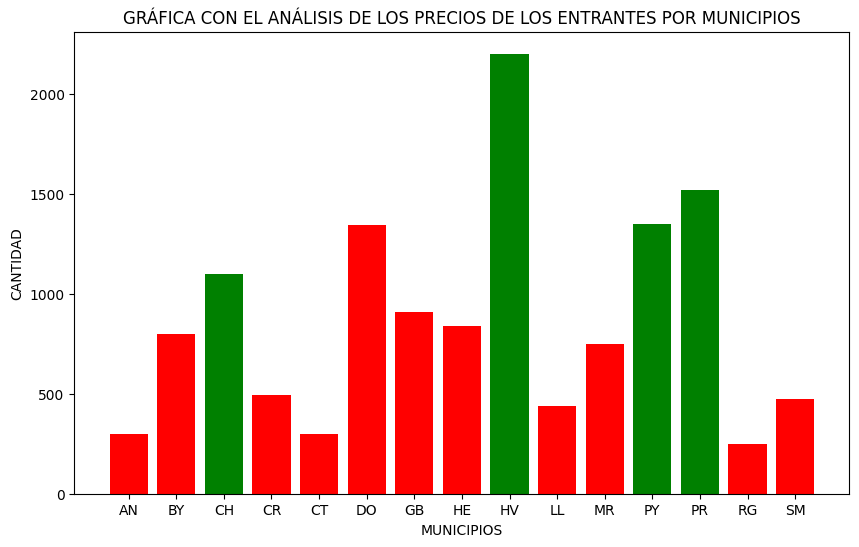

In [32]:
x = ['AN', 'BY', 'CH', 'CR', 'CT', 'DO', 'GB', 'HE', 'HV','LL','MR','PY','PR','RG','SM']
app = []
for ap in x:
    app.append(media(ap,"appetizers")) 
    
pyplot_bar(app,"GRÁFICA CON EL ANÁLISIS DE LOS PRECIOS DE LOS ENTRANTES POR MUNICIPIOS")

Después de difrutar de un sabroso entrante,  es necesario para llenarse el estómago es bueno consumir un plato fuerte, los cuaes pueden estar elaborados  por carnes de tierra, mariscos, risottos con un fuerte contenido alimenticio por lo que elabore la siguiente gráfica para hacer un análisis de los precios de los platos principales de los restaurantes de casa municipio, donde se puede apreciar que sigue prevaleciendo los altos precios en zonas con alta concentración de extranjeros, algo que  esperaba, pues se me hace imposible a mi y a mis padres comer en no de los lugares que encabezan la gráfca.

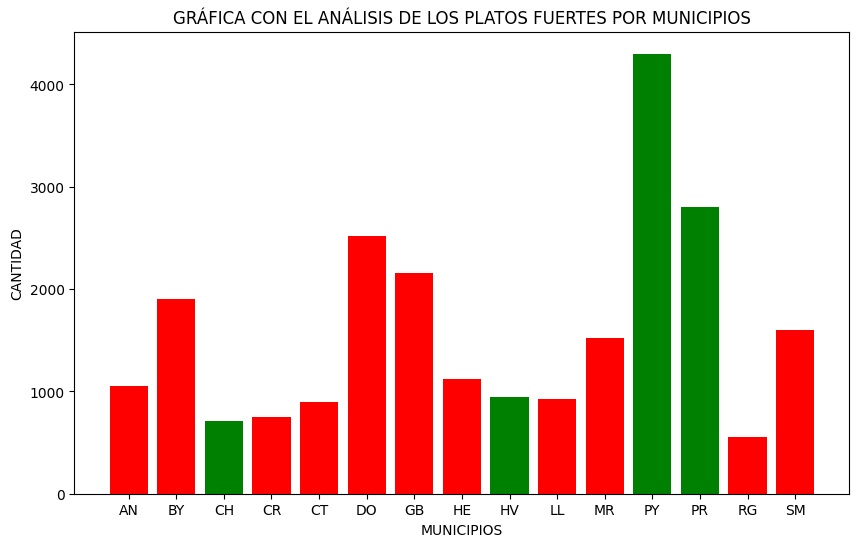

In [33]:
md = []
for pp in x:
    md.append(media(pp,"main_dishes"))
pyplot_bar(md, "GRÁFICA CON EL ANÁLISIS DE LOS PLATOS FUERTES POR MUNICIPIOS")

 Ahora como fanático  de la comida italiana les comparto una gráfica con la comparación de los precios de las pizzas. En la cual se puede apreciar que encabezan la lista municipios o los mal llamados "Monte", ya que ahí al haber una baja atracción turística, lo más rentable para ofertar a los cubanos son las pizzas, por lo que hay sitios que exceden los precios a costilla del hambre ajena

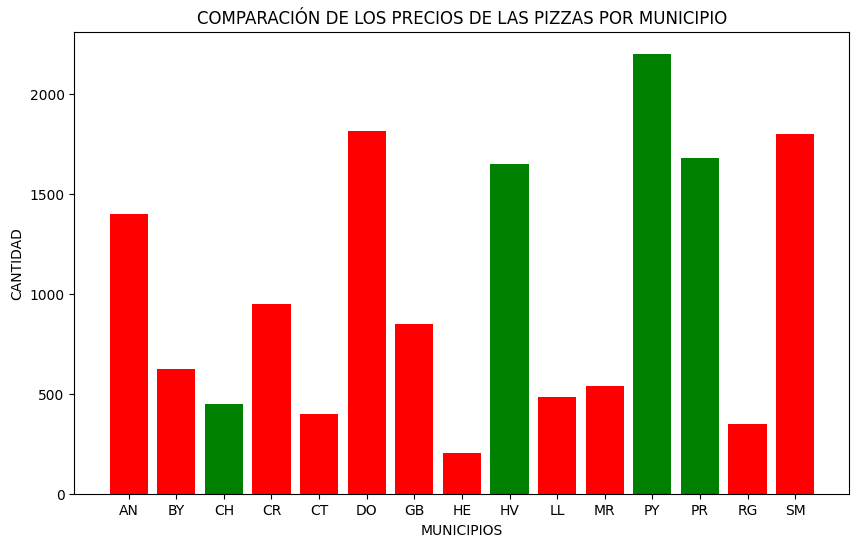

In [34]:
pz = []
for p in x:
    pz.append(media(p,"pizzas"))
pyplot_bar(pz, "COMPARACIÓN DE LOS PRECIOS DE LAS PIZZAS POR MUNICIPIO")


 Para bajar la comida no baja sólo con la fuerza de gravedad, no, nececesita, de una pequeña pero cara ayuda, que son los bebidas, que ayudan a la comida a bajar en el corto período de tiempo en que se permanece en un restaurante, por lo que les comparto la comparativa por municipio.

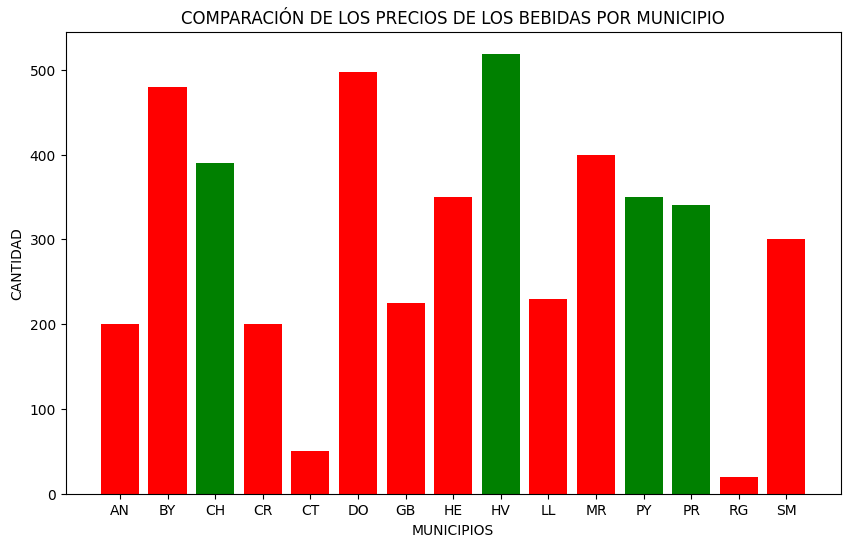

In [35]:
dk = []
for d in x:
    dk.append(media(d,"drinks"))
pyplot_bar(dk, "COMPARACIÓN DE LOS PRECIOS DE LOS BEBIDAS POR MUNICIPIO")

 Yo un día trabajando en el proyecto le pregunto a mi madre, que pregunta le gustaría responder sobre los precios de las bebidas que cada vez están más caras. Y como cubana al fin me dijo que le interesaría saber la relación de precio entre la cerveza y los otros líquidos, y como a mi me gusta más el refreso que las bebidas alcohólicas me tome el atrevimiento de incuir los refrescos en el análisis. Por lo que para compartir el resultado con usted le comparto una gráfica de pastel y una barras que lo muestra de manera clara la relación de precios entre la cerveza, los refrescos y las otras bebidas alcohólicas y no alcohólicas.

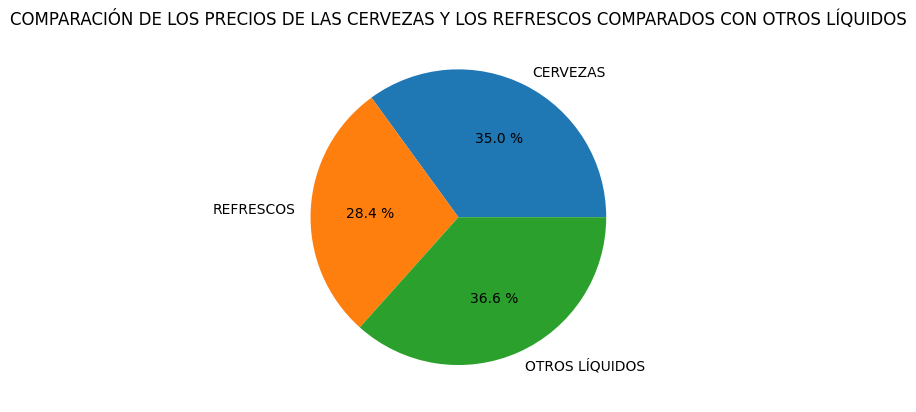

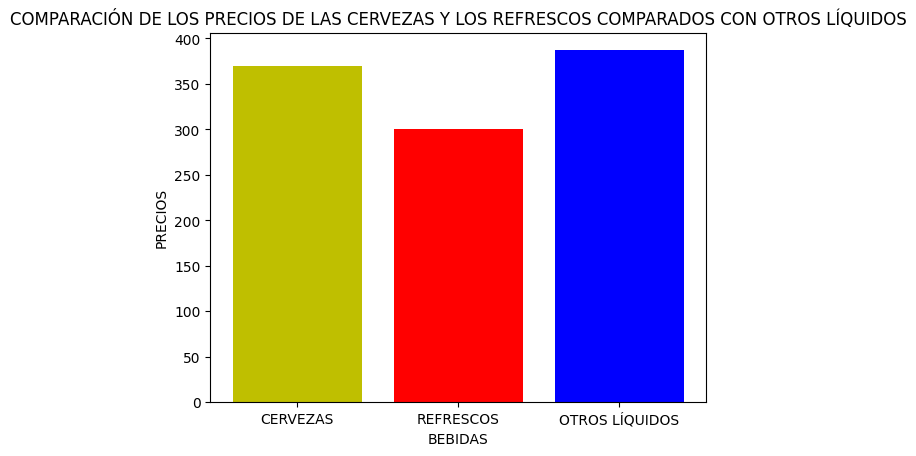

In [36]:
drinks()

 ¿Ya estás lleno verdad?, pero no se ha terminado todavía, aún falta más.

 Yo soy cubano, y como todo cubano sufre del problema del transporte, por que hay veces que no puedo ir presencialmente a los lugares, por lo que si tengo hambre y no puedo salir de mi casa, no me queda otra opción que solicitar un servicio de mensajería si el restaurante elegido para la compra lo ofrece. Por lo que quie haer un análisis para ver como es el comportamiento de dichos servicios de mensajería en la capital  de Cuba.

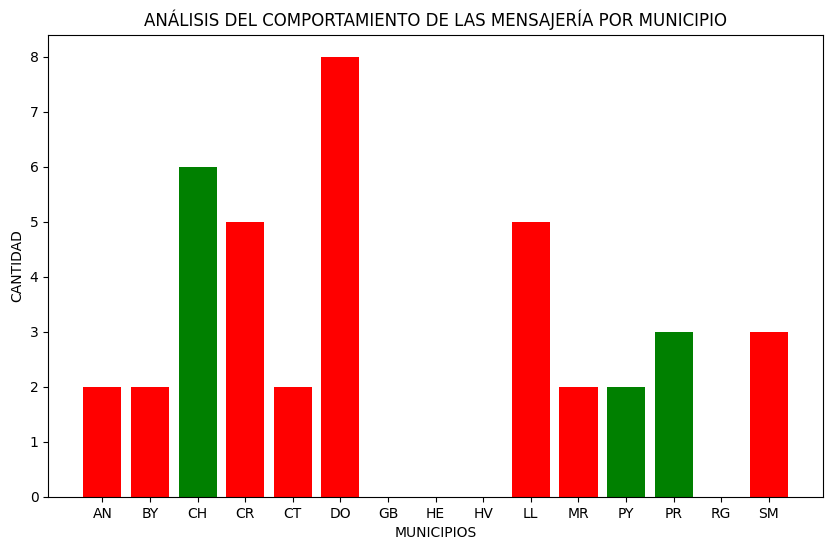

In [37]:

pyplot_bar(dlvrs, "ANÁLISIS DEL COMPORTAMIENTO DE LAS MENSAJERÍA POR MUNICIPIO")

 Yo mirando en redes sociales, como critican el salario de Cuba, donde ponen mucho enfasis en que gustos se puede dar un cubano con el fruto del trabajo de un mes, quise hacer un cálculo basado en los datos que capturé con el por ciento de lugares que pueden ser accedidos con el salario de un cubano, el cual conforma la mayor parte de la clientera de un restaurante cubano.

In [38]:

print(" En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: ")
print(f"UN {porcent} % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.")

 En base a un cálculo utilizando la bibioteca Numpy , métodos numéricos de python y tomando como referencia el salario media de Cuba en 2023 publicado en el anuario estadístico de 2024 pude llegar al resultado de que: 
UN 56.49999999999999 % DE LOS RESTAURANTES ANÁLIZADOS NO EXIGEN UN PRESUPUESTO MAYOR A AL SALARIO MEDIA DE CUBA.


 Y también debe querer saber cual municipio tiene mayor cantidad que otros, por lo que les comparto la siguiente gráfica comparativa:

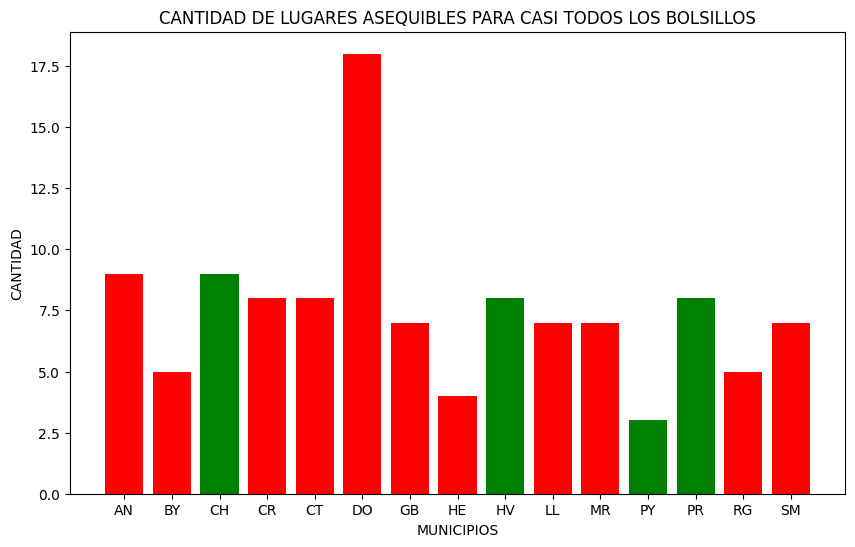

In [39]:

pyplot_bar(pb, "CANTIDAD DE LUGARES ASEQUIBLES PARA CASI TODOS LOS BOLSILLOS")

A continuación les muestro un mapa con información básica de los restaurantes análizados :

In [40]:
map()

 Aquí les compartó un breve sistema de recomendación basado en un municipio de preferencia con el que se cuenta y el tipo de cocina :

In [ ]:
search_person()